### CS4622 Mini Kaggle Competition - Multiclass Image Classification
#### Author: Sabine Hollatz

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
# %tensorflow_version 2.x
import tensorflow as tf

import seaborn as sns

In [48]:
X_train = np.load('../../data_comp4/cuboulder-image-labelling/train_and_test/X_train.npy')
y_train = np.load('../../data_comp4/cuboulder-image-labelling/train_and_test/y_train.npy')
X_test = np.load('../../data_comp4/cuboulder-image-labelling/train_and_test/X_test.npy')
print("Number of samples: {}, number of classes: {}".format(y_train.shape[0], y_train.shape[1]))
print("image size: {}x{}x{}".format(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

Number of samples: 39209, number of classes: 43
image size: 32x32x3


In [37]:
# print(y_train[:10])
y_categorical = [np.where(r==1)[0][0] for r in y_train]
print(y_categorical[:100])
unique, counts = np.unique(y_categorical, return_counts=True)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
class labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


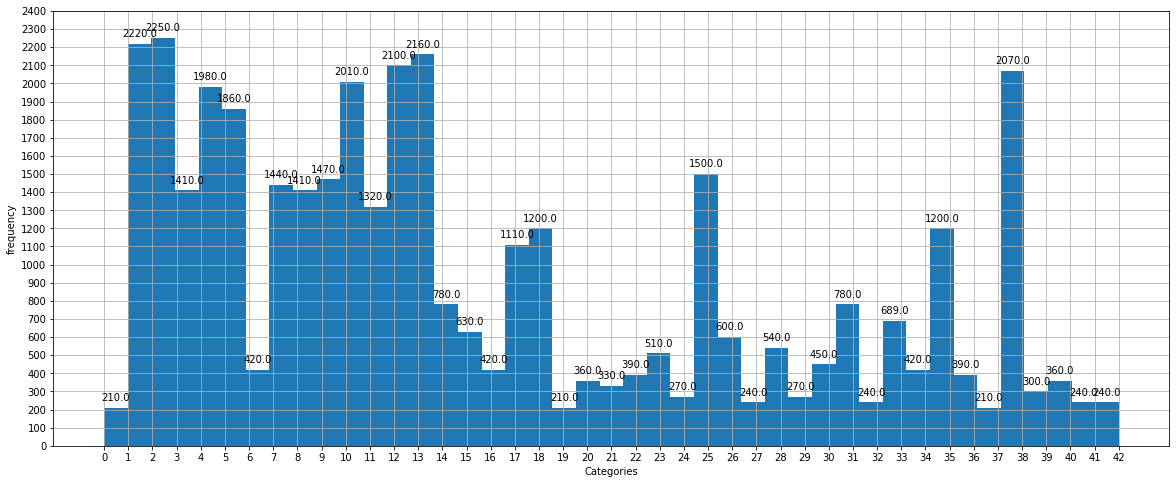

In [45]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(20,8))
counts, bins, rects = plt.hist(y_categorical, label="distribution of categories by label", bins = 43)
autolabel(rects)
plt.grid(True)
plt.xticks(np.arange(0, 43, step=1))
plt.yticks(np.arange(0, 2500, step=100))
plt.ylabel('frequency')
plt.xlabel('Categories');

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [82]:
seed = 7

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    data_format = "channels_last")

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    data_format = "channels_last")

In [80]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

inputtensor = Input(shape=(32, 32, 3))

base_model = tf.keras.applications.vgg16.VGG16(
    include_top=False, 
    weights='imagenet', 
    input_tensor=inputtensor, 
    input_shape=(32, 32, 3), 
    pooling=None)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.categorical_accuracy, 'acc'])


In [83]:
epochs = 100
batchsize = 64
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=batchsize), 
                    validation_data=val_datagen.flow(X_val, y_val, batch_size=batchsize),
                    steps_per_epoch=len(X_train) / batchsize,
                    shuffle=True,
                    callbacks=[callback],
                    epochs=epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 490.109375 steps, validate for 123 steps
Epoch 1/100
491/490 [==============================] - 127s 258ms/step - loss: 1.6588 - categorical_accuracy: 0.5015 - acc: 0.5015 - val_loss: 1.2187 - val_categorical_accuracy: 0.6153 - val_acc: 0.6153
Epoch 2/100
491/490 [==============================] - 129s 263ms/step - loss: 1.0395 - categorical_accuracy: 0.6729 - acc: 0.6729 - val_loss: 0.9563 - val_categorical_accuracy: 0.6913 - val_acc: 0.6913
Epoch 3/100
491/490 [==============================] - 129s 263ms/step - loss: 0.8139 - categorical_accuracy: 0.7421 - acc: 0.7421 - val_loss: 0.7979 - val_categorical_accuracy: 0.7415 - val_acc: 0.7415
Epoch 4/100
491/490 [==============================] - 130s 264ms/step - loss: 0.6742 - categorical_accuracy: 0.7845 - acc: 0.7845 - val_loss: 0.6697 - val_categorical_accuracy: 0.7890 - val_acc: 0.7890
Epoch 5/100
491/490 [==============================] - 130s 264ms/step - loss: 0.5681 -

491/490 [==============================] - 129s 263ms/step - loss: 0.0543 - categorical_accuracy: 0.9829 - acc: 0.9829 - val_loss: 0.2992 - val_categorical_accuracy: 0.9286 - val_acc: 0.9286
Epoch 41/100
491/490 [==============================] - 127s 259ms/step - loss: 0.0485 - categorical_accuracy: 0.9847 - acc: 0.9847 - val_loss: 0.3162 - val_categorical_accuracy: 0.9259 - val_acc: 0.9259


In [85]:
print(history.history)

{'loss': [1.6589830640352965, 1.0391541941726037, 0.8144015736159868, 0.6743432031848492, 0.568336296698929, 0.4846513913363901, 0.4247317852089987, 0.37559058198619627, 0.3283224393658678, 0.29280041295301207, 0.26187980844755837, 0.23614964532066235, 0.21712988633872082, 0.19154715715910572, 0.18143602525480154, 0.16710054978861785, 0.14707895413272232, 0.1424818293616937, 0.1329478597566027, 0.12276532241837851, 0.10878256001995265, 0.11438449496773229, 0.10219425266933951, 0.09379266458732004, 0.09191262119935095, 0.08885455964486527, 0.08760583559473067, 0.07845412524858907, 0.07402330027679943, 0.06842333599315778, 0.0650497425015946, 0.06720438341187301, 0.07164018015241921, 0.07329318107998575, 0.05745192076507902, 0.04914572437694925, 0.052259502690832356, 0.05449746698226608, 0.07265166660790548, 0.054369849969967424, 0.04858150370648241], 'categorical_accuracy': [0.5014506, 0.6729047, 0.74208564, 0.784455, 0.8194918, 0.84754676, 0.867249, 0.88054323, 0.8974081, 0.9105429, 0.

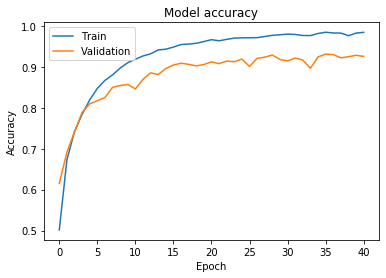

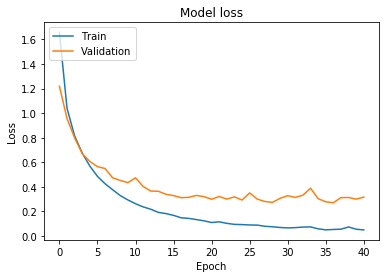

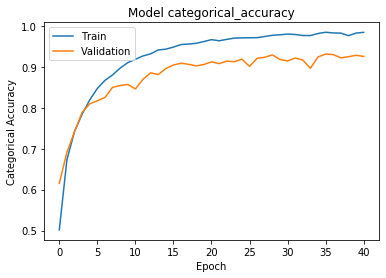

In [87]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model categorical_accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [96]:
predictions = model.predict(X_test)
predictions[:2]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.5778222e-23, 0.0000000e+00, 0.0000000e+00, 0.0000000

In [93]:
np.rint(predictions)
print(predictions[:2].astype('int'))

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]]


In [94]:
# pd.DataFrame(np_array).to_csv("path/to/file.csv")
preds_to_submit = pd.DataFrame(predictions.astype('int'))
preds_to_submit

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12627,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12628,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
preds_to_submit.to_csv("./VGG16_predictions.csv")

In [97]:
preds_to_submit_probs = pd.DataFrame(predictions)
preds_to_submit_probs

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12626,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12627,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,2.952375e-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12628,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
preds_to_submit_probs.to_csv("./VGG16_predictions_probabilities.csv")